## Observations and Insights 

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_mouse_df.head()
# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Checking the number of mice.

number_mice = len(mouse_metadata["Mouse ID"])
number_mice

249

In [39]:
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mouse = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_mouse_data = combined_mouse_df[combined_mouse_df['Mouse ID'].isin(duplicated_mouse['Mouse ID'])==True]
duplicated_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse = combined_mouse_df[combined_mouse_df['Mouse ID'].isin(duplicated_mouse_data['Mouse ID'])==False]
clean_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [42]:
# Checking the number of mice in the clean DataFrame.

num_mice = len((clean_mouse['Mouse ID'].unique()))
num_mice

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_group = clean_mouse.groupby('Drug Regimen')
drug_mean = drug_group['Tumor Volume (mm3)'].mean()
drug_median = drug_group['Tumor Volume (mm3)'].median()
drug_var = drug_group['Tumor Volume (mm3)'].var()
drug_stdev = drug_group['Tumor Volume (mm3)'].std()
drug_sem = drug_group['Tumor Volume (mm3)'].sem()

drug_summary = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median,
                               'Variance': drug_var, 'Standard Deviation': drug_stdev,
                               'SEM': drug_sem})
drug_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_summary = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
                                    ['mean', 'median', 'var','std','sem'])
drug_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

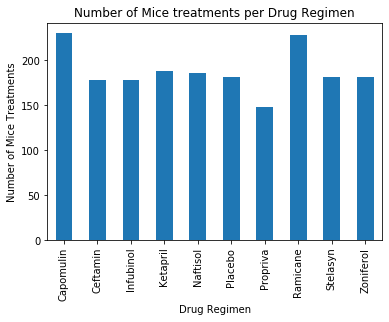

In [45]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_group = clean_mouse.groupby('Drug Regimen').agg({'Mouse ID': ['count']})
bar = drug_group.plot(kind='bar', legend=None)
bar.set_title('Number of Mice treatments per Drug Regimen')
bar.set_ylabel('Number of Mice Treatments')
plt.show()

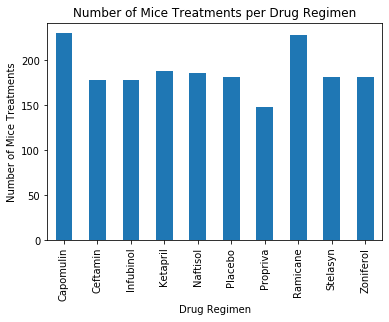

In [50]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_mice = clean_mouse['Drug Regimen'].value_counts()
drug_mice = drug_mice.sort_index(ascending = True)
plt.bar(drug_mice.index.values, drug_mice.values, width=.50)
plt.xticks(rotation='vertical')
plt.xlim(-.5, 9.5)
plt.title('Number of Mice Treatments per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Treatments')
plt.show()

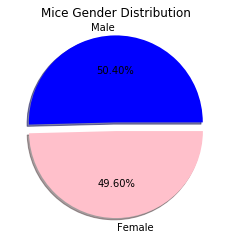

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

remove_dup_mice = clean_mouse.drop_duplicates(['Mouse ID'])

sex = remove_dup_mice['Sex'].value_counts()
colors = ['blue', 'pink']
pie = sex.plot(kind='pie', title = 'Mice Gender Distribution', explode = (.1,0), colors=colors, autopct='%2.2f%%', shadow=True)
pie.set_ylabel('')
plt.show()


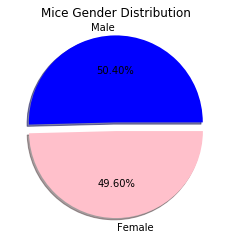

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["blue", "pink"]
labels = ['Male', 'Female']
plt.pie(sex.values, explode = (.1,0), colors=colors, autopct='%2.2f%%', shadow=True, labels=labels)
plt.title('Mice Gender Distribution')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [59]:
clean_mouse.sort_values(by = (['Mouse ID', 'Timepoint']))
last_timepoint = clean_mouse.drop_duplicates(['Mouse ID'], keep = 'last')
last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.000000,0,Ketapril,Male,15,29
20,x336,0,45.000000,0,Naftisol,Female,4,29
53,h428,0,45.000000,0,Ketapril,Female,1,27
55,v199,0,45.000000,0,Naftisol,Female,17,29
109,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [60]:
capomulin_last_timepoint_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Capomulin']
ramicane_last_timepoint_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Ramicane']
infubinol_last_timepoint_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Infubinol']
ceftamin_last_timepoint_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Ceftamin']
capomulin_last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
650,w150,10,39.952347,0,Capomulin,Male,23,23
801,r157,15,46.539206,0,Capomulin,Male,22,25
930,f966,20,30.485985,0,Capomulin,Male,16,17
1497,j246,35,38.753265,1,Capomulin,Female,21,21
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1769,t565,45,34.455298,0,Capomulin,Female,20,17
1771,l509,45,41.483008,3,Capomulin,Male,17,21
1777,g288,45,37.074024,1,Capomulin,Male,3,19
1788,r554,45,32.377357,3,Capomulin,Female,8,17
1791,g316,45,40.159220,2,Capomulin,Female,22,22


In [62]:
capomulin_volumes = capomulin_last_timepoint_df['Tumor Volume (mm3)']
ramicane_volumes = ramicane_last_timepoint_df['Tumor Volume (mm3)']
infubinol_volumes = infubinol_last_timepoint_df['Tumor Volume (mm3)']
ceftamin_volumes = ceftamin_last_timepoint_df['Tumor Volume (mm3)']
capomulin_volumes

650     39.952347
801     46.539206
930     30.485985
1497    38.753265
1764    38.982878
1769    34.455298
1771    41.483008
1777    37.074024
1788    32.377357
1791    40.159220
1797    31.896238
1800    33.329098
1817    38.846876
1821    40.658124
1829    38.939633
1838    36.041047
1843    28.430964
1846    28.484033
1849    23.343598
1850    37.311846
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), dtype: float64

In [63]:
# Put treatments into a list for for loop (and later for plot labels)

def print_outliers(drug, outlier):
    if outlier == []:
        print(drug, 'volume outliers: None')
    else:
        outlier = [value for value in outlier]
        print(drug, 'volume outliers:', str(outlier))

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [64]:
capomulin = 'Capomulin'
capomulin_quartiles = capomulin_volumes.quantile([.25,.5,.75])
capomulin_iqr = capomulin_quartiles[.75] - capomulin_quartiles[.25]
capomulin_lower = capomulin_quartiles[.25] - (1.5*capomulin_iqr)
capomulin_upper = capomulin_quartiles[.75] + (1.5*capomulin_iqr)
capomulin_outliers = [volume for volume in capomulin_volumes if volume < capomulin_lower or volume > capomulin_upper]
print_outliers(capomulin, capomulin_outliers)  

ramicane = 'Ramicane'
ramicane_quartiles = ramicane_volumes.quantile([.25,.5,.75])
ramicane_iqr = ramicane_quartiles[.75] - ramicane_quartiles[.25]
ramicane_lower = ramicane_quartiles[.25] - (1.5*ramicane_iqr)
ramicane_upper = ramicane_quartiles[.75] + (1.5*ramicane_iqr)
ramicane_outliers = [volume for volume in ramicane_volumes if volume < ramicane_lower or volume > ramicane_upper]
print_outliers(ramicane, ramicane_outliers)  

infubinol = 'Infubinol'
infubinol_quartiles = infubinol_volumes.quantile([.25,.5,.75])
infubinol_iqr = infubinol_quartiles[.75] - infubinol_quartiles[.25]
infubinol_lower = infubinol_quartiles[.25] - (1.5*infubinol_iqr)
infubinol_upper = infubinol_quartiles[.75] + (1.5*infubinol_iqr)
infubinol_outliers = [volume for volume in infubinol_volumes if volume < infubinol_lower or volume > infubinol_upper]
print_outliers(infubinol, infubinol_outliers)     

ceftamin = 'Ceftamin'
ceftamin_quartiles = ceftamin_volumes.quantile([.25,.5,.75])
ceftamin_iqr = ceftamin_quartiles[.75] - ceftamin_quartiles[.25]
ceftamin_lower = ceftamin_quartiles[.25] - (1.5*ceftamin_iqr)
ceftamin_upper = ceftamin_quartiles[.75] + (1.5*ceftamin_iqr)
ceftamin_outliers = [volume for volume in ceftamin_volumes if volume < ceftamin_lower or volume > ceftamin_upper]
print_outliers(ceftamin, ceftamin_outliers)

Capomulin volume outliers: None
Ramicane volume outliers: None
Infubinol volume outliers: [36.321345799999996]
Ceftamin volume outliers: None


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


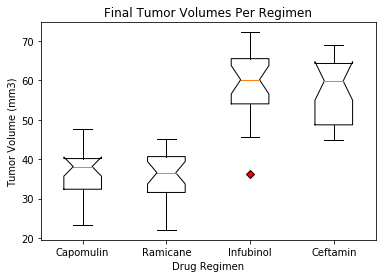

In [66]:
good_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_volumes = [capomulin_volumes, ramicane_volumes,
                       infubinol_volumes, ceftamin_volumes]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes Per Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
marker = dict(markerfacecolor='r', marker='D')
ax1.boxplot(drug_volumes, labels = good_drugs, notch=True, flierprops=marker)
plt.show()


## Line and Scatter Plots

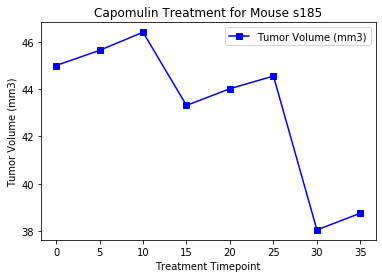

In [73]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_regimen = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin'].reset_index(drop=True)
capomulin_mouse = capomulin_regimen.loc[capomulin_regimen['Mouse ID'] == capomulin_regimen['Mouse ID'][1]]

plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'],
        marker='s', color='blue', label = 'Tumor Volume (mm3)')
plt.xticks(capomulin_mouse['Timepoint'])
plt.title('Capomulin Treatment for Mouse s185')
plt.xlabel('Treatment Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.show()

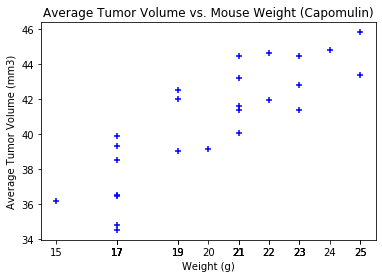

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_group = capomulin_regimen.groupby('Mouse ID')
weight = capomulin_group['Weight (g)'].mean()
avg_volume = capomulin_group['Tumor Volume (mm3)'].mean()


fig1,ax1 = plt.subplots()
ax1.scatter(weight, avg_volume, marker='+', color = 'b')
ax1.set_title('Average Tumor Volume vs. Mouse Weight (Capomulin)')
ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xticks(weight.values)


## Correlation and Regression

In [89]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


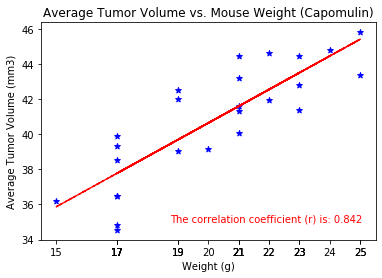

In [90]:
capomulin_group = capomulin_regimen.groupby('Mouse ID')
weight = capomulin_group['Weight (g)'].mean()
avg_volume = capomulin_group['Tumor Volume (mm3)'].mean()

fig1,ax1 = plt.subplots()
ax1.scatter(weight, avg_volume, marker='*', color = 'b')
ax1.set_title('Average Tumor Volume vs. Mouse Weight (Capomulin)')
ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xticks(weight.values)

slope, intercept, rvalue, pvalue, stderr = linregress(weight, avg_volume)
r_value = 'The correlation coefficient (r) is: ' + str(round(rvalue,3))
regress_line = weight * slope + intercept
ax1.annotate(r_value, (18.75,35), color = 'r')
ax1.plot(weight, regress_line, 'r-.')
plt.show()